## Research question/interests

Briefly describe your research question or interests here.

**How are medical expenditures distributed across various regions and genders?**

I would use my dataset, which contains region, gender, and medical cost data, to solve this research question. I would first clean and preprocess it to guarantee that the data is ready for analysis. I'd investigate the distribution of medical costs across different regions and genders using visualization tools like histograms, count plots and pair plots.For exmaple, I would use a pair plot to compare medical expenditures based on each region for each gender. Using these visualizations, I would look at potential linkages and patterns between region and gender on medical expenditures.

**Is there a link between smoking behaviours and medical costs, and does it differ by area and gender in the United States?**

I will utilize the original dataset comprising data on smoking behaviours, medical bills, and demographic data such as gender and region in the United States to solve this research issue. I'll start by cleaning and analyzing the data to remove missing values or outliers. Additionally, I will add an extra column using the data from the dataset, which will give the number of smokers based on their region and gender. Then, I will use different visualizations like scatter plots and box plots. For example the distribution of medical expenditures for smokers and nonsmokers would be depicted using various box colours for different genders and locations. to investigate the association between smoking behaviours, medical costs, geography, and gender.

**Is there a relationship between BMI (Body Mass Index) and medical costs, and how does it vary across different regions and genders?


In [48]:
import pandas as pd
df = pd.read_csv('../data/raw/Medical_Cost.csv')


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white",
              font_scale=1.1, 
             )
plt.rc("axes.spines", top=False, right=False)

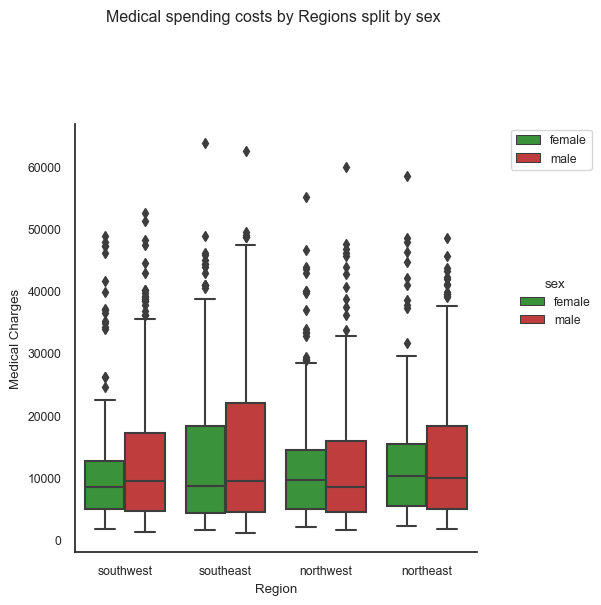

In [105]:
p = sns.color_palette(['tab:green', 'tab:red'])

x = sns.catplot(data=df, x='region', y='charges', hue='sex', kind='box', palette=p)
x.fig.suptitle("Medical spending costs by Regions split by sex", y=1.2)
x.set(xlabel="Region", ylabel="Medical Charges")

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()



Using the seaborn library, this code generates a FacetGrid, which is a method of generating many graphs depending on a 
category variable. In this example, the plots are histograms that depict the distribution of medical spending cases by gender for each location. The code also adds axis labels and a primary title to the plot, as well as a specific colour palette for male and female.

The resulting graphic demonstrates that the distribution of medical expenditure instances varies by area, with some regions having more cases than others. Furthermore, the plot demonstrates that there are gender inequalities in the distribution of medical spending instances. In most of the regions, the number if medical cases are the same 

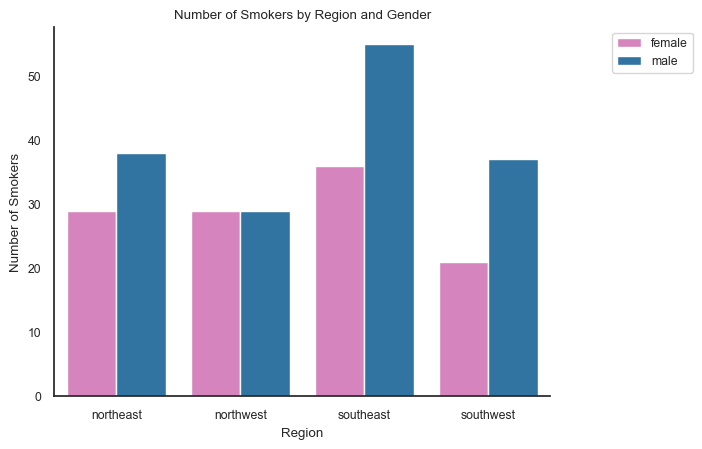

In [106]:
p = sns.color_palette(['tab:pink', 'tab:blue'])
s = df.groupby(['region', 'sex', 'smoker'])['smoker'].count().reset_index(name="count")
s = s[s['smoker'] == 'yes']
sns.barplot(data=s, x='region', y='count', hue='sex', palette=p)
plt.title("Number of Smokers by Region and Gender")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Region")
plt.ylabel("Number of Smokers")
plt.show()


The graph depicts the number of smokers by gender in each location. The data is compiled by counting the number of smokers in each location and gender category. According to the bar plot, the Southeast area has the most smokers, followed by the Northeast, Southwest, and Northwest regions. In addition, male smokers outnumber female smokers in all locations other than the northwest region where they are relatively similar. Generally, this graph gives information about the prevalence of smoking behaviours among people from various countries and genders. It implies that smoking is more widespread among men and those living in the Southeast.

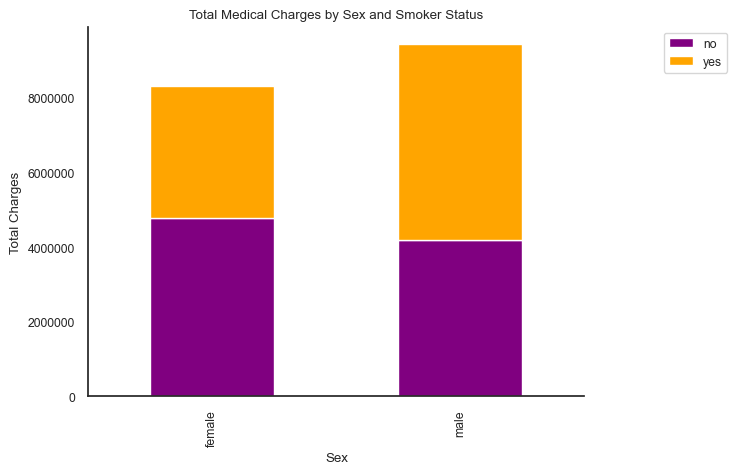

In [107]:
p= pd.pivot_table(data=df, values='charges', index='sex', columns='smoker', aggfunc='sum')
c = ['purple', 'orange']
ax = p.plot(kind='bar', stacked=True,color=c)
plt.title('Total Medical Charges by Sex and Smoker Status')
plt.xlabel('Sex')
plt.ylabel('Total Charges')
ax.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


The graph depicts the overall medical costs spent by individuals based on gender and smoking status. The bar plot is layered, with various colours showing the number of charges levied against smokers and nonsmokers of each gender. Men smokers incur the most overall medical costs, followed by female smokers, male nonsmokers, and female nonsmokers. Smoking has a major influence on medical expenditures, with smokers paying far more than non-smokers. The gender gap in medical expenses is less evident than the difference in smoking status. 
Looking at the bar chart, we can observe that male smokers have greater overall medical expenditures than female smokers. The difference between male and female nonsmokers, on the other hand, is less apparent. This implies that smoking has a far bigger influence on medical bills than gender. It is also worth noting that the overall charges for nonsmokers are significantly cheaper than for smokers, regardless of gender. This emphasises the importance of smoking cessation and preventive initiatives in reducing the burden of medical expenditures, particularly for smokers.

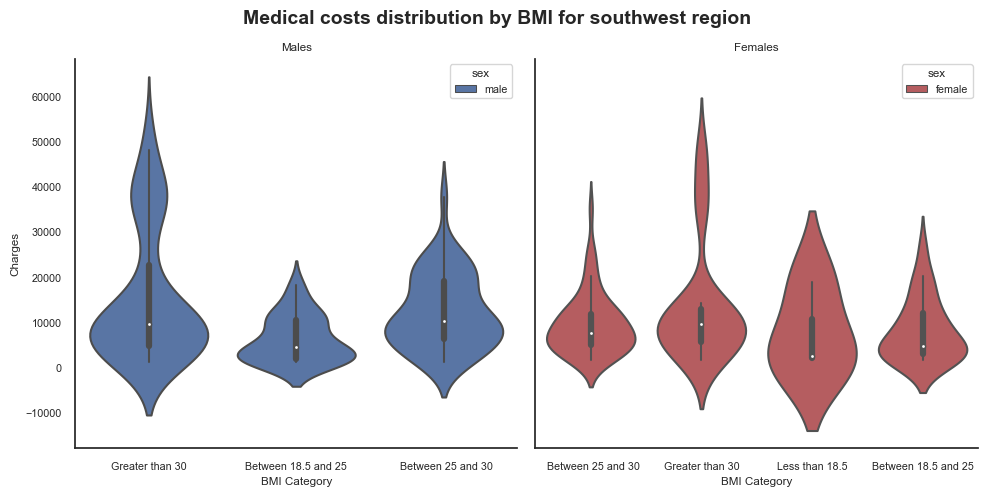

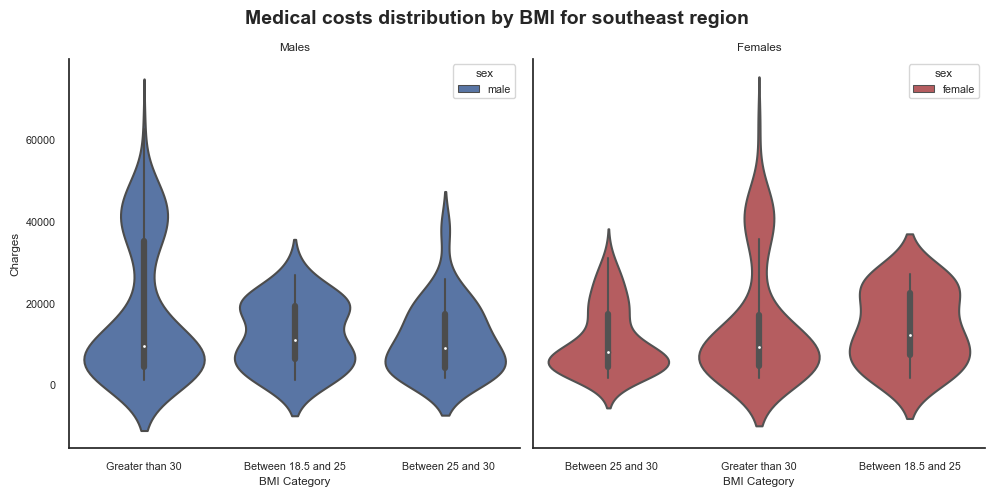

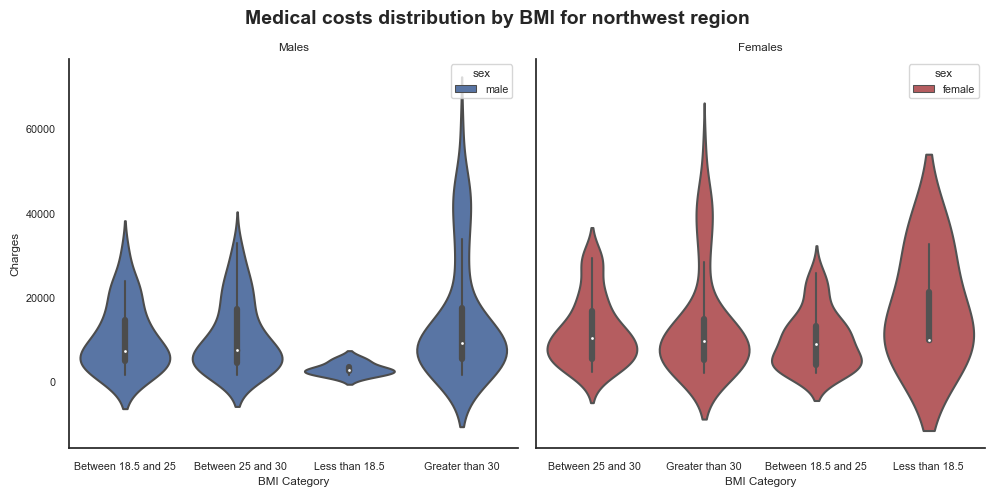

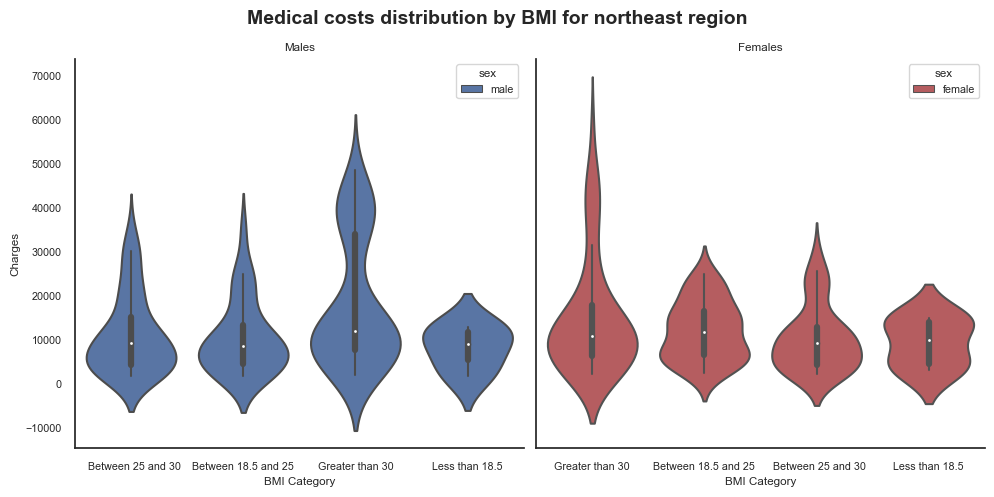

In [113]:
sns.set_theme(style="white",
              font_scale=0.7, 
             )
plt.rc("axes.spines", top=False, right=False)

def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Less than 18.5'
    elif bmi >= 18.5 and bmi < 25:
        return 'Between 18.5 and 25'
    elif bmi >= 25 and bmi < 30:
        return '  Between 25 and 30'
    else:
        return 'Greater than 30'

df['bmi_category'] = df['bmi'].apply(get_bmi_category)

male_data = df[df['sex'] == 'male']
female_data = df[df['sex'] == 'female']

for region in df['region'].unique():
    male_region_data = male_data[male_data['region'] == region]
    female_region_data = female_data[female_data['region'] == region]
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 5))
    fig.suptitle('Medical costs distribution by BMI for {} region'.format(region), fontsize=14, fontweight='bold')
    sns.violinplot(x='bmi_category', y='charges', hue='sex', data=male_region_data, palette=['b', 'g'], ax=ax1)
    ax1.set_title('Males')
    ax1.set_xlabel('BMI Category')
    ax1.set_ylabel('Charges')
    sns.violinplot(x='bmi_category', y='charges', hue='sex', data=female_region_data, palette=['r', 'm'], ax=ax2)
    ax2.set_title('Females')
    ax2.set_xlabel('BMI Category')
    ax2.set_ylabel('')
    plt.tight_layout()
    plt.savefig('violinplot_{}.png'.format(region))
    plt.show()


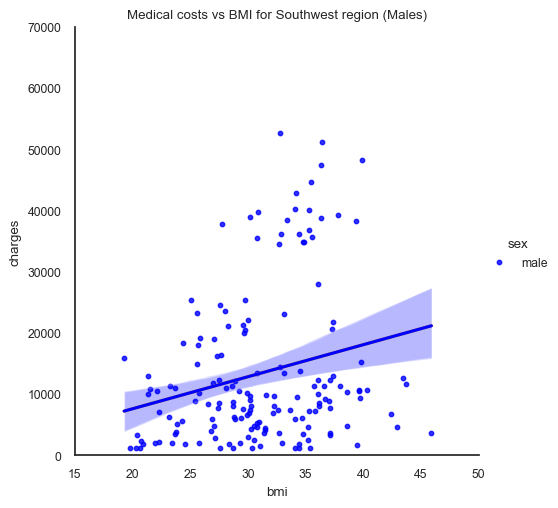

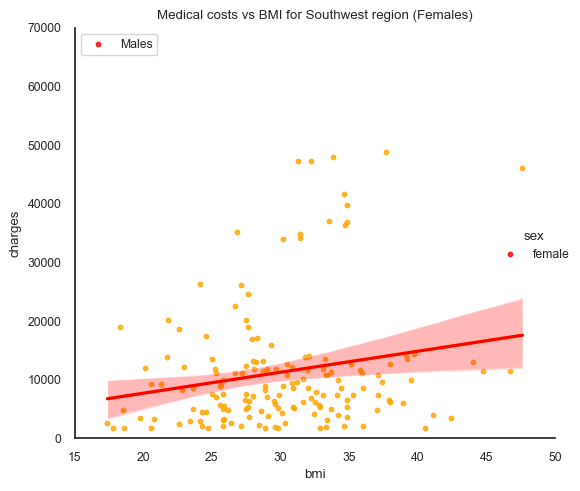

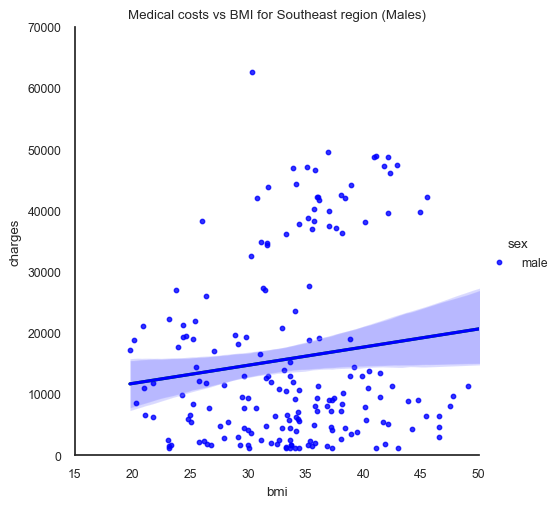

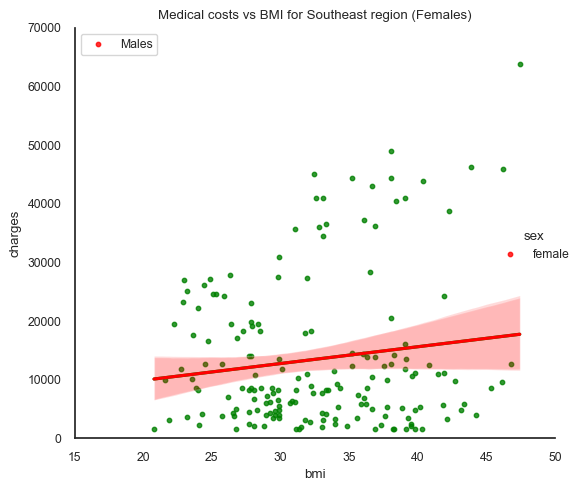

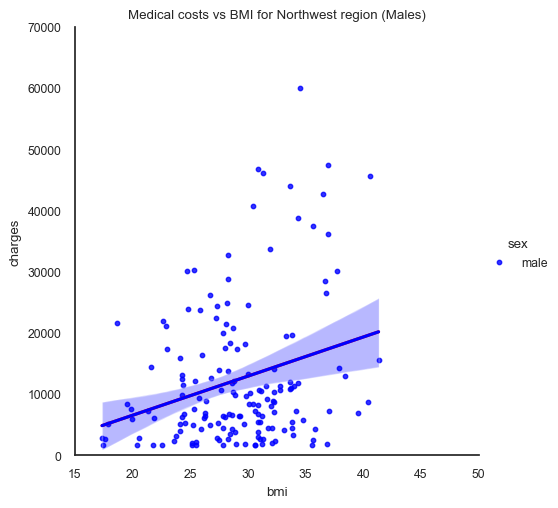

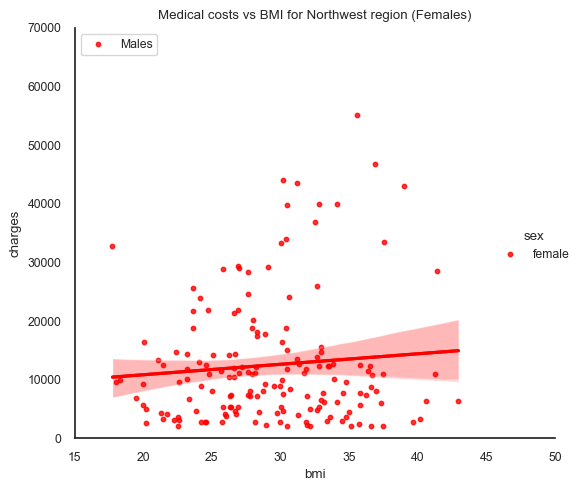

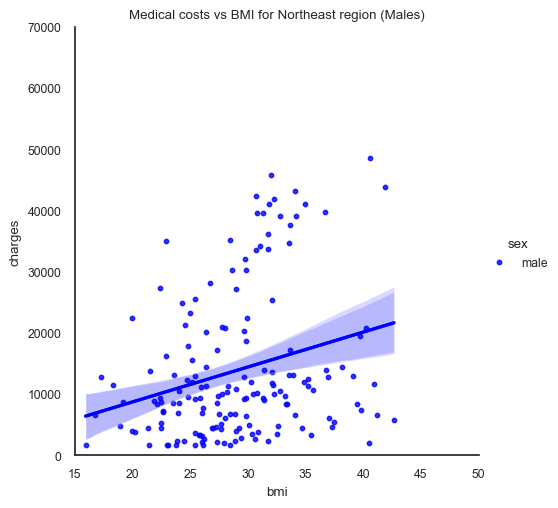

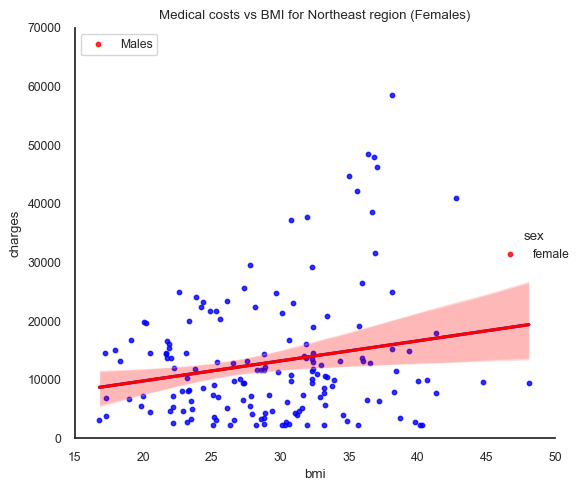

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

male_data = df[df['sex'] == 'male']
female_data = df[df['sex'] == 'female']

colors = {'northeast': 'blue', 'southeast': 'green', 'southwest': 'orange', 'northwest': 'red'}

for region in df['region'].unique():
    region_data = df[df['region'] == region]
    male_region_data = male_data[male_data['region'] == region]
    female_region_data = female_data[female_data['region'] == region]
    
    sns.lmplot(x='bmi', y='charges', data=male_region_data, hue='sex', palette={'male': 'blue'}, scatter_kws={'s': 10})
    plt.title('Medical costs vs BMI for {} region (Males)'.format(region.capitalize()))
    plt.xlabel('BMI')
    plt.ylabel('Medical Costs')
    plt.xlim(15, 50)
    plt.ylim(0, 70000)
    
    male_regression = sns.regplot(x='bmi', y='charges', data=male_region_data, color='blue', scatter=False)
    
    sns.lmplot(x='bmi', y='charges', data=female_region_data, hue='sex', palette={'female': 'red'}, scatter_kws={'s': 10})
    plt.title('Medical costs vs BMI for {} region (Females)'.format(region.capitalize()))
    plt.xlabel('BMI')
    plt.ylabel('Medical Costs')
    plt.xlim(15, 50)
    plt.ylim(0, 70000)
    
    female_regression = sns.regplot(x='bmi', y='charges', data=female_region_data, color='red', scatter=False)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    handles = [handles[0]] # update handles to remove second handle
    labels = ['Males', 'Females']
    plt.gca().legend(handles, labels, loc='upper left')
    
    male_regression.lines[0].set_color(colors[region])
    female_regression.lines[0].set_color(colors[region])
    handles[0].set_color(colors[region])
    
    plt.tight_layout()
    plt.show()


## Clean the data
I will clean the data by removing the duplicate and the null values. I also dropped an unused column which is the children column

In [110]:
df = pd.read_csv('../data/raw/Medical_Cost.csv')
print(f"The original dataset: {df.shape[0]} rows, {df.shape[1]} columns")
df = df.drop_duplicates()
print(f"The dataset after removing duplicates: {df.shape[0]} rows, {df.shape[1]} columns")
df = df.dropna()
print(f"The dataset after removing null values: {df.shape[0]} rows, {df.shape[1]} columns")

The original dataset: 1338 rows, 7 columns
The dataset after removing duplicates: 1337 rows, 7 columns
The dataset after removing null values: 1337 rows, 7 columns


#### I will check for outliers 

Since my questions are based on sex, region and smokers, they do not have any outlier values

#### I am processing the data
When processing the data I added a new column that return an abbreviated value of the gender and region if the person is a smoker. For example if the person who smokes is a female and she lives in the south west region, the column sill display F-SW. if the person is not a smoker, it will display a value of 0.

In [33]:
df['smoker'] = df['smoker'].map({'yes': 'y', 'no': 'n'})

region_sex_map = {
    ('y', 'northwest', 'male'): 'M-NW',
    ('y', 'northwest', 'female'): 'F-NW',
    ('y', 'northeast', 'male'): 'M-NE',
    ('y', 'northeast', 'female'): 'F-NE',
    ('y', 'southwest', 'male'): 'M-SW',
    ('y', 'southwest', 'female'): 'F-SW',
    ('y', 'southeast', 'male'): 'M-SE',
    ('y', 'southeast', 'female'): 'F-SE',
}

for idx, row in df.iterrows():
    region_sex = region_sex_map.get((row['smoker'], row['region'], row['sex']), 0)
    df.loc[idx, 'region_sex'] = region_sex
    
df = df.drop_duplicates().dropna()
df.head()


,age,sex,bmi,children,smoker,region,charges,region_sex
0,19,female,27.900,0,y,southwest,16884.92400,F-SW
1,18,male,33.770,1,n,southeast,1725.55230,0
2,28,male,33.000,3,n,southeast,4449.46200,0
3,33,male,22.705,0,n,northwest,21984.47061,0
4,32,male,28.880,0,n,northwest,3866.85520,0


**Method Chaining**

In [ ]:
import pandas as pd

def load_and_process(file):

    def s(row):
        if row['smoker'] == 'y':
            if row['region'] == 'northwest':
                if row['sex'] == 'male':
                    return 'M-NW'
                else:
                    return 'F-NW'
            elif row['region'] == 'northeast':
                if row['sex'] == 'male':
                    return 'M-NE'
                else:
                    return 'F-NE'
            elif row['region'] == 'southwest':
                if row['sex'] == 'male':
                    return 'M-SW'
                else:
                    return 'F-SW'
            elif row['region'] == 'southeast':
                if row['sex'] == 'male':
                    return 'M-SE'
                else:
                    return 'F-SE'
        else:
            return 0

    df = (
        pd.read_csv(file)
          .drop(['children'], axis=1)
    )
    
    df= (
        df.drop_duplicates()
          .dropna()
    )
    
    df=(df.
          assign(smoker=lambda x: x['smoker'].map({'yes': 'y', 'no': 'n'}))
          .assign(region_sex=lambda x: x.apply(s, axis=1))
         )
    
    
   

    return df

file = '../data/raw/Medical_Cost.csv'
df = load_and_process(file)
print(f"The dataset after data cleaning: {df.shape[0]} rows, {df.shape[1]} columns")
df


The dataset after data cleaning: 1337 rows, 7 columns


,age,sex,bmi,smoker,region,charges,region_sex
0,19,female,27.900,y,southwest,16884.92400,F-SW
1,18,male,33.770,n,southeast,1725.55230,0
2,28,male,33.000,n,southeast,4449.46200,0
3,33,male,22.705,n,northwest,21984.47061,0
4,32,male,28.880,n,northwest,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,male,30.970,n,northwest,10600.54830,0
1334,18,female,31.920,n,northeast,2205.98080,0
1335,18,female,36.850,n,southeast,1629.83350,0
1336,21,female,25.800,n,southwest,2007.94500,0
